<a href="https://colab.research.google.com/github/glauciodrumond/Airbnb_Data_Analysis_Hawaii/blob/master/Airbnb_Data_Analysis__Hawaii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Analysis - Hawaii
The [Airbnb](https://www.airbnb.com.br/)  is already considered to be the **largest hotel company today**. Oh, the detail is: **it does not have any hotel**!

Connecting people around the world who want to travel and hosts who want to rent their properties in a practical and easy way, Airbnb 
provides an innovative platform to make this hosting alternative.


At the end of 2018, the Startup founded 10 years ago, had already **hosted more than 300 million** people around the world, challenging traditional hotel chains.


One of Airbnb's initiatives is to provide website data for some of the world's major cities. Throught the webpage [Inside Airbnb](http://insideairbnb.com/get-the-data.html), 
it is possible to download a large amount of data to develop *Data Science* projects and solutions.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


**In this *notebook*, we will analyze the data relating to the city of Hawaii, and see what insights can be extracted from raw data.**

#Getting the Data
All data used here was extract from [Inside Airbnb](http://insideairbnb.com/get-the-data.html)
For inicial analysis exploratory, it will be only download the archive:


*  listings.csv - Summary information and metrics for listings in Rio de Janeiro (good for visualisations)

In [0]:
#importing packs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
#getting the data from archive listings.csv
data = pd.read_csv ('http://data.insideairbnb.com/united-states/hi/hawaii/2019-12-04/visualisations/listings.csv')

In [5]:
#shows the variables
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,20.04095,-155.43251,Entire home/apt,85,2,37,2019-08-19,0.45,2,359
1,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02621,-155.70145,Entire home/apt,110,2,9,2019-10-20,0.09,5,251
2,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43119,-155.88079,Entire home/apt,92,5,162,2019-11-19,1.36,3,282
3,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56413,-155.96347,Entire home/apt,299,6,17,2019-11-21,0.23,3,217
4,5390,STAY AT PRINCE KUHIO!,7887,Todd,Kauai,Koloa-Poipu,21.88305,-159.47372,Entire home/apt,92,3,130,2019-11-18,1.01,1,170


#Q1. How many attributes(variables) and how many entries does our set has? What is the variables type?

Let's go ahead and identify the number of entries that our dataset has and see the types of each column.

This dataset we downloaded is the "short" version of Airbnb. On the same page we downloaded the file listings.csv. There is a more complete version with 35847 entries and 106 variables (listings.csv.gz).

In [6]:
#Indetify the data volume 
print("Variables:\t {}".format(data.shape[0]))
print("Entries:\t {}\n".format(data.shape[1]))

display(data.dtypes)

Variables:	 23745
Entries:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

#Q2. What is the percentage of missing values ​​in the dataset?

The quality of a dataset is directly related to the amount of missing values. It is important to understand early on whether these null values ​​are significant compared to the total entries.

*  You can see that the revies_per_month and last_review column has close to 23% of its missing values.
*  The variable host_name have approximately 1,2% of the null values.
*  The variable name  have have approximately 0.07% of the null values.




In [7]:
# sort the variables in descending order by their missing values
(data.isnull().sum() / data.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.229564
last_review                       0.229564
host_name                         0.011623
name                              0.000674
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

#Q3. What is the type of distribution of the variables?
To identify the distribution of the variables, I will plot the histogram.

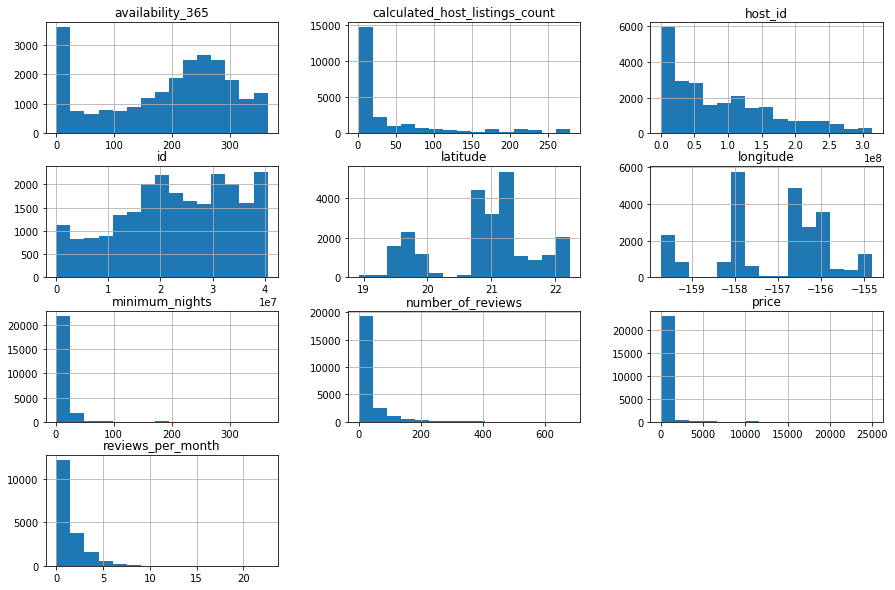

In [8]:
#Only numerical histogram will be plot
data.hist(bins=15, figsize=(15,10));

#Q4. Any outliers?

By distributing the histogram, it is possible to check for evidence of the presence of outliers. Take for example the variables price, minimum_nights and calculated_host_listings_count.

Values ​​do not follow a distribution, and distort the entire graphic representation. To confirm, there are two easy ways to help detect outliers. Are they:

* Statistical summary using the description () method
* Plot boxplots for a variable.




In [9]:
#verifie the statistical summary of numerical variables
data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23745.000000,23745.000000,23745.000000,18294.000000,23745.000000,23745.000000
mean,358.380291,5.385597,26.257907,1.398526,42.577090,190.334344
std,936.067258,11.176797,46.780110,1.523295,68.151171,110.226253
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,128.000000,1.000000,1.000000,0.300000,2.000000,102.000000
50%,199.000000,3.000000,7.000000,0.880000,7.000000,219.000000
75%,340.000000,5.000000,31.000000,2.020000,54.000000,275.000000
max,24999.000000,365.000000,680.000000,22.600000,279.000000,365.000000


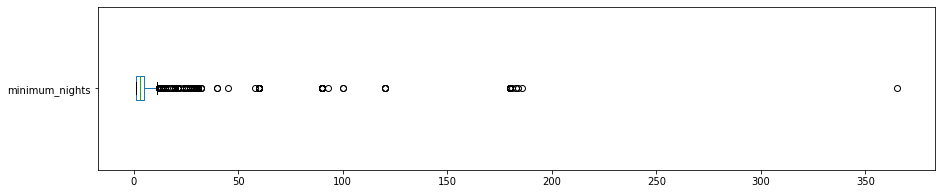

minimum_nights: values over 30:
173 entries
0.7286%


In [11]:
# minimum_nights
data.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: values over 30:")
print("{} entries".format(len(data[data.minimum_nights > 30])))
print("{:.4f}%".format((len(data[data.minimum_nights > 30]) / data.shape[0])*100))

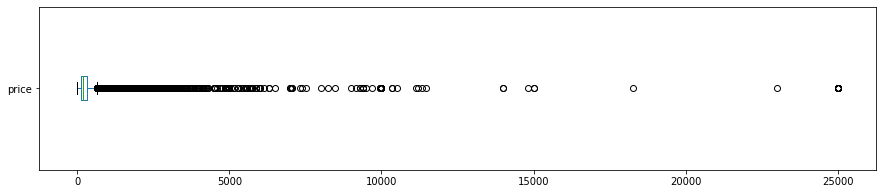


price: values over 1500
594 entries
2.5016%


In [12]:
# price
data.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: values over 1500")
print("{} entries".format(len(data[data.price > 1500])))
print("{:.4f}%".format((len(data[data.price > 1500]) / data.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

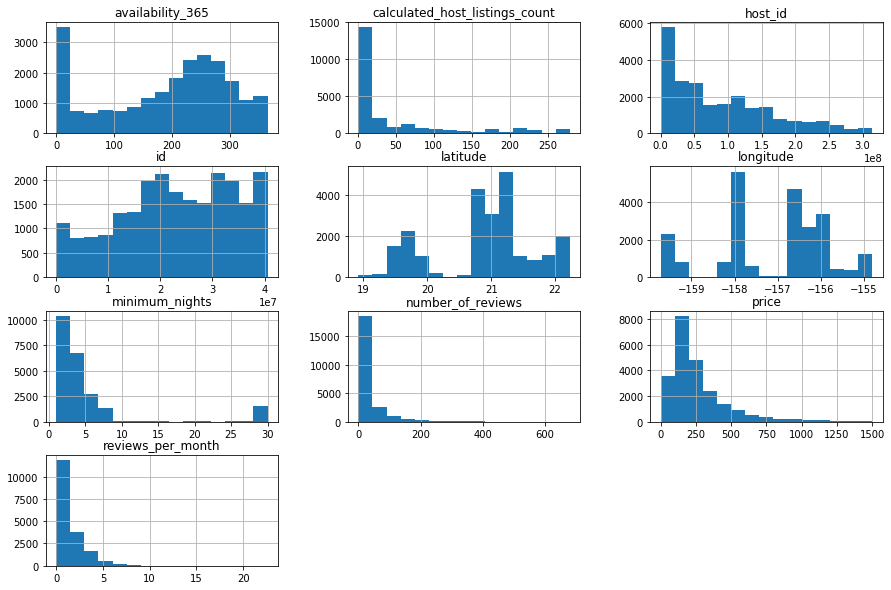

In [13]:
# remover os *outliers* em um novo DataFrame
df_clean = data.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));